In [1]:
import pandas as pd
import numpy as np

In [2]:
# Read the CSV files
algoR = pd.read_csv('/Users/gadimg/Library/Mobile Documents/com~apple~CloudDocs/PhD dis/second/Results/AlgoGrobys.csv')
cryptoR = pd.read_csv('/Users/gadimg/Library/Mobile Documents/com~apple~CloudDocs/PhD dis/second/Results/CryptoGrobys.csv')
tokenR = pd.read_csv('/Users/gadimg/Library/Mobile Documents/com~apple~CloudDocs/PhD dis/second/Results/TokenGrobys.csv')
algo = pd.read_csv('/Users/gadimg/Library/Mobile Documents/com~apple~CloudDocs/PhD dis/second/Results/Algo.csv')
crypto = pd.read_csv('/Users/gadimg/Library/Mobile Documents/com~apple~CloudDocs/PhD dis/second/Results/Crypto.csv')
token = pd.read_csv('/Users/gadimg/Library/Mobile Documents/com~apple~CloudDocs/PhD dis/second/Results/Token.csv')

# Creating the groups
alphaAlgos = algo['alpha']
alphaRAlgos = algoR['alpha']
alphaCrypto = crypto['alpha']
alphaRCrypto = cryptoR['alpha']
alphaToken = token['alpha']
alphaRToken = tokenR['alpha']


In [12]:
alphaAlgos

0    2.044955
1    2.423372
2    3.125186
3    2.327611
4    2.345897
5    2.978546
6    2.654186
7    1.000000
8    2.609849
9    1.000000
Name: alpha, dtype: float64

In [3]:
from scipy import stats

# Combine the alpha values into a list
alpha_values = [alphaAlgos, alphaCrypto, alphaToken]

# Perform Kruskal-Wallis test
statistic, p_value = stats.kruskal(*alpha_values)

# Print the results
print("Kruskal-Wallis test statistic:", statistic)
print("p-value:", p_value)


Kruskal-Wallis test statistic: 3.870429389935885
p-value: 0.14439326498807964


In [4]:
# Combine the data frames into a list
#groups = [algoR, cryptoR, tokenR]

# Create a logical index for columns to be deleted
#columnIndex = 4  # Update with the desired column index (0 to 4)
#for i in range(len(groups)):
    # Get the specified column
 #   column = groups[i].iloc[:, columnIndex]
    
    # Find the rows with NaN values or values less than 0.1 in the column
  #  rowsToDelete = column.isnull() | (column < 0.1)
    
    # Delete the rows from the group
   # groups[i] = groups[i][~rowsToDelete]

# Extract the 'alpha' column from each group
alphaRAlgos = algoR['alpha']
alphaRCrypto = cryptoR['alpha']
alphaRToken = tokenR['alpha']
alphaRAlgos.dropna(inplace=True)
alphaRCrypto.dropna(inplace=True)

In [5]:
# Combine the alpha values into a list
alpha_valuesR = [alphaRAlgos, alphaRCrypto, alphaRToken]

# Perform Kruskal-Wallis test
statistic, p_value = stats.kruskal(*alpha_valuesR)

# Print the results
print("Kruskal-Wallis test statistic:", statistic)
print("p-value:", p_value)


Kruskal-Wallis test statistic: 7.5392792325641835
p-value: 0.023060372372638097


In [166]:
alphaRAlgos

0    3.102054
1    2.391979
2    2.500200
3    1.955496
4    2.548940
5    2.556469
6    2.090457
7    2.125930
Name: alpha, dtype: float64

In [6]:
import scipy.stats as stats

# Assuming 'data' is an array or list containing the data for a single group

# Perform the Shapiro-Wilk test
statistic, p_value = stats.shapiro(alphaRCrypto)

# Print the test results
print("Shapiro-Wilk Test:")
print("Test Statistic:", statistic)
print("p-value:", p_value)


Shapiro-Wilk Test:
Test Statistic: 0.8902362585067749
p-value: 0.0068085272796452045


In [7]:
import scikit_posthocs as sp

In [8]:
posthoc_results = sp.posthoc_dunn(alpha_valuesR, p_adjust='holm')
print("Pairwise Comparison (Dunn's test) Results:")
print(posthoc_results)

Pairwise Comparison (Dunn's test) Results:
          1         2         3
1  1.000000  0.239821  0.034995
2  0.239821  1.000000  0.091522
3  0.034995  0.091522  1.000000


In [9]:
print(alphaRCrypto.median())
print(alphaRToken.median())
print(alphaRAlgos.median())

2.5195933975
2.675667146
2.5021175214999998


In [244]:
#Bootstrapping to check for robustness
import numpy as np
from scipy import stats


# Compute the Kruskal-Wallis test statistic on the original data
kw_statistic, p_value = stats.kruskal(alphaRAlgos, alphaRCrypto, alphaRToken)
original_statistic = kw_statistic

# Set the number of resampling iterations
n_iterations = 10000

# Perform bootstrapping
bootstrapped_statistics = []
pstat=[]
for _ in range(n_iterations):
    # Resample with replacement from each group
    resampled_algo = np.random.choice(alphaRAlgos, size=len(alphaRAlgos), replace=True)
    resampled_crypto = np.random.choice(alphaRCrypto, size=len(alphaRCrypto), replace=True)
    resampled_token = np.random.choice(alphaRToken, size=len(alphaRToken), replace=True)
    
    # Compute the Kruskal-Wallis test statistic on the resampled data
    resampled_statistic, p = stats.kruskal(resampled_algo, resampled_crypto, resampled_token)
    
    # Store the resampled test statistic
    
    bootstrapped_statistics.append(resampled_statistic)
    #pstat.append(p)
# Calculate the empirical p-value
empirical_p_value = np.mean(np.array(bootstrapped_statistics) >= original_statistic)

# Print the original test statistic and the empirical p-value
print("Original Test Statistic:", original_statistic)
print("Empirical p-value:", empirical_p_value)


Original Test Statistic: 7.5392792325641835
Empirical p-value: 0.574


In [231]:
len(bootstrapped_statistics)

7219

In [196]:
a=0
for i in bootstrapped_statistics:
    if i > original_statistic:
        a+=1

In [219]:
alphaRAlgos

0    3.102054
1    2.391979
2    2.500200
3    1.955496
4    2.548940
5    2.556469
6    2.090457
7    2.125930
Name: alpha, dtype: float64

In [20]:
#subset analysis
for subset in [(alphaRAlgos, alphaRCrypto), (alphaRAlgos, alphaRToken), (alphaRCrypto, alphaRToken)]:
    # Combine the groups in the current subset
    combined_data = np.concatenate(subset)
    
    # Perform the Kruskal-Wallis test on the current subset
    kw_statistic, p_value = stats.kruskal(*subset)
    
    # Print the results
    print("Subset:", subset)
    print("Combined Data:", combined_data)
    print("Kruskal-Wallis Test Statistic:", kw_statistic)
    print("p-value:", p_value)
    print("--------------------")

Subset: (0    1.878351
1    2.500968
2    2.597502
3    2.157698
4    2.283441
5    2.535090
6    2.507108
7    2.503267
Name: alpha, dtype: float64, 0     2.520922
1     2.598438
2     2.762552
3     2.781437
4     1.823568
5     2.084857
6     2.306785
7     3.838190
8     2.518500
9     2.377200
10    2.557782
11    2.645053
12    3.520301
13    2.520687
14    2.511392
15    3.544110
16    2.000228
17    2.169626
18    2.006358
19    2.520737
20    2.264478
22    2.848118
23    3.511600
24    2.138753
25    2.561729
26    2.044021
27    2.518042
28    1.900941
Name: alpha, dtype: float64)
Combined Data: [1.87835141 2.50096772 2.59750159 2.15769842 2.28344149 2.53508957
 2.5071081  2.50326732 2.52092155 2.59843818 2.76255187 2.78143726
 1.82356817 2.0848565  2.30678516 3.8381899  2.51849996 2.37720031
 2.55778233 2.64505265 3.52030129 2.52068684 2.51139199 3.54410975
 2.00022845 2.16962636 2.00635807 2.52073744 2.26447798 2.84811809
 3.51159987 2.13875295 2.56172862 2.04402147 2.5180

In [243]:
#Bootstrapping to check for robustness with ONLY TWO GROUPS


# Compute the Kruskal-Wallis test statistic on the original data
kw_statistic, p_value = stats.kruskal(alphaRAlgos, alphaRToken)
original_statistic = kw_statistic

# Set the number of resampling iterations
n_iterations = 10000

# Perform bootstrapping
bootstrapped_statistics = []
pstat=[]
for _ in range(n_iterations):
    # Resample with replacement from each group
    resampled_algo = np.random.choice(alphaRAlgos, size=len(alphaRAlgos), replace=True)
    
    resampled_token = np.random.choice(alphaRToken, size=len(alphaRToken), replace=True)
    
    # Compute the Kruskal-Wallis test statistic on the resampled data
    resampled_statistic, p = stats.kruskal(resampled_algo, resampled_token)
    
    # Store the resampled test statistic
    
    bootstrapped_statistics.append(resampled_statistic)
    #pstat.append(p)
# Calculate the empirical p-value
empirical_p_value = np.mean(np.array(bootstrapped_statistics) >= original_statistic)

# Print the original test statistic and the empirical p-value
print("Original Test Statistic:", original_statistic)
print("Empirical p-value:", empirical_p_value)


Original Test Statistic: 7.466666666666654
Empirical p-value: 0.1188


In [10]:
#permutations


observed_statistic, p_value = stats.kruskal(alphaRAlgos, alphaRCrypto, alphaRToken)
import numpy as np

# Combine the groups into a single array
combined_data = np.concatenate([alphaRAlgos, alphaRCrypto, alphaRToken])

# Define the number of permutations
n_permutations = 10000

# Initialize an array to store the permuted test statistics
permuted_statistics = np.zeros(n_permutations)

# Perform the permutation test
for i in range(n_permutations):
    # Randomly permute the group labels
    np.random.shuffle(combined_data)
    
    # Calculate the test statistic for the current permutation
    permuted_statistic, _ = stats.kruskal(
        combined_data[:len(alphaRAlgos)],
        combined_data[len(alphaRAlgos):len(alphaRAlgos) + len(alphaRCrypto)],
        combined_data[len(alphaRAlgos) + len(alphaRCrypto):]
    )
    
    # Store the permuted test statistic
    permuted_statistics[i] = permuted_statistic
    
# Calculate the p-value
p_value_permutation = np.sum(permuted_statistics >= observed_statistic) / n_permutations

print("Observed Test Statistic:", observed_statistic)
print("Permutation Test p-value:", p_value_permutation)


Observed Test Statistic: 7.5392792325641835
Permutation Test p-value: 0.0221


In [11]:
#from scipy import stats
#import numpy as np

def permutation_test_kruskal(group1, group2, group3, n_permutations=10000):
    # Compute observed Kruskal-Wallis statistic
    observed_statistic, _ = stats.kruskal(group1, group2, group3)
    
    # Combine groups
    combined_data = np.concatenate([group1, group2, group3])
    
    # Perform permutations and track how often we see a test statistic as extreme as the observed
    count_extreme_values = 0
    for _ in range(n_permutations):
        np.random.shuffle(combined_data)
        
        # Divide shuffled data back into groups
        perm_group1 = combined_data[:21]
        perm_group2 = combined_data[21:49]
        perm_group3 = combined_data[49:]
        
        permuted_statistic, _ = stats.kruskal(perm_group1, perm_group2, perm_group3)
        
        if permuted_statistic >= observed_statistic:
            count_extreme_values += 1
            
    p_value = count_extreme_values / n_permutations
    
    return observed_statistic, p_value

# Example usage
group1 = np.random.rand(20)
group2 = np.random.rand(10)
group3 = np.random.rand(28)

observed_statistic, p_value_permutation = permutation_test_kruskal(alphaRToken, alphaRCrypto, alphaRAlgos)
print(f"Observed Kruskal-Wallis Statistic: {observed_statistic}")
print(f"Permutation Test p-value: {p_value_permutation}")


Observed Kruskal-Wallis Statistic: 7.5392792325641835
Permutation Test p-value: 0.02


In [28]:
len(alphaRCrypto)

28

In [12]:
import scipy.stats as stats
import numpy as np


# Perform the Shapiro-Francia test for each group
shapiro_statistic1, shapiro_p_value1 = stats.shapiro(alphaRToken)
shapiro_statistic2, shapiro_p_value2 = stats.shapiro(alphaRCrypto)
shapiro_statistic3, shapiro_p_value3 = stats.shapiro(alphaRAlgos)

# Interpret the results
alpha = 0.05  # Significance level

# Group 1
if shapiro_p_value1 < alpha:
    print("Group 1 is not normally distributed (reject the null hypothesis)")
else:
    print("Group 1 appears to be normally distributed (fail to reject the null hypothesis)")

# Group 2
if shapiro_p_value2 < alpha:
    print("Group 2 is not normally distributed (reject the null hypothesis)")
else:
    print("Group 2 appears to be normally distributed (fail to reject the null hypothesis)")

# Group 3
if shapiro_p_value3 < alpha:
    print("Group 3 is not normally distributed (reject the null hypothesis)")
else:
    print("Group 3 appears to be normally distributed (fail to reject the null hypothesis)")


Group 1 appears to be normally distributed (fail to reject the null hypothesis)
Group 2 is not normally distributed (reject the null hypothesis)
Group 3 appears to be normally distributed (fail to reject the null hypothesis)


In [39]:
import statsmodels.api as sm
import numpy as np

# Example data for three groups (replace this with your actual data)
group1 = np.array([15, 20, 25, 30, 35])
group2 = np.array([12, 18, 24, 30, 36])
group3 = np.array([10, 20, 30, 40, 50])

# Perform the Lilliefors test for each group
lilliefors_statistic1, lilliefors_p_value1 = sm.stats.lilliefors(alphaRToken)
lilliefors_statistic2, lilliefors_p_value2 = sm.stats.lilliefors(alphaRCrypto)
lilliefors_statistic3, lilliefors_p_value3 = sm.stats.lilliefors(alphaRAlgos)

# Interpret the results
alpha = 0.05  # Significance level

# Group 1

print(lilliefors_p_value1)

print(lilliefors_p_value2)

print(lilliefors_p_value3)

    


0.06796768275571409
0.024683374885853787
0.013947419769776705


In [13]:
#dropping the outliers here for crypto-backed to see if they affect the KW test result and the normality test

# Drop rows containing 'USDP8886' or 'DOLA' in the first column
cryptoNoOutlier = cryptoR.drop(cryptoR[cryptoR['Coin'].isin(['DOLA-USD.csv'])].index)
cryptoNoOutlier = cryptoNoOutlier['alpha']
cryptoNoOutlier.dropna(inplace=True)
#'USDP8886-USD.csv',

In [14]:
#performing the kruskal wallis again and the dunn test and normality test
statistic, p_value = stats.shapiro(cryptoNoOutlier)

# Print the test results
print("Shapiro-Wilk Test:")
print("Test Statistic:", statistic)
print("p-value:", p_value)


Shapiro-Wilk Test:
Test Statistic: 0.8946092128753662
p-value: 0.010090204887092113


In [15]:
# Combine the alpha values into a list
alpha_ = [alphaRAlgos, cryptoNoOutlier, alphaRToken]

# Perform Kruskal-Wallis test
statistic, p_value = stats.kruskal(*alpha_)

# Print the results
print("Kruskal-Wallis test statistic:", statistic)
print("p-value:", p_value)

Kruskal-Wallis test statistic: 8.418277837450773
p-value: 0.01485915777344018


In [92]:
posthoc_results = sp.posthoc_dunn(alpha_, p_adjust='holm')
print("Pairwise Comparison (Dunn's test) Results:")
print(posthoc_results)

Pairwise Comparison (Dunn's test) Results:
          1         2         3
1  1.000000  0.307877  0.030796
2  0.307877  1.000000  0.048330
3  0.030796  0.048330  1.000000


In [93]:
cryptoR

,Coin,alpha,xmin,p
0,ANGLE-USD.csv,2.520922,0.880739,0.133
1,BITCNY-USD-nonUSD.csv,2.598438,0.061478,0.105
2,CEUR-USD-nonUSD.csv,2.762552,0.352709,0.279
3,CUSD-USD,2.781437,0.127129,0.122
4,CUSD21871-USD-(usdt-backed).csv,1.823568,0.406200,0.104
5,DAI-USD,2.084857,1.668343,0.800
6,DJED-USD.csv,2.306785,3.279571,0.500
7,DOLA-USD.csv,3.838190,1.427027,0.156
8,DUSD-USD.csv,2.518500,7.011668,0.431
9,EOSDT-USD.csv,2.377200,0.793706,0.109


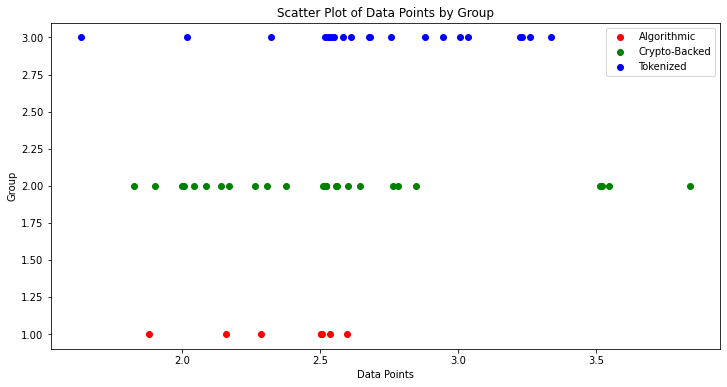

In [23]:
#plotting the groups
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have three groups of data: group_a, group_b, and group_c
# Each group is a NumPy array or a list of data points

# Create a scatter plot
plt.figure(figsize=(12, 6))

# Plot points for group_a in red
plt.scatter(alphaRAlgos, np.ones(len(alphaRAlgos)), color='red', label='Algorithmic')

# Plot points for group_b in green
plt.scatter(alphaRCrypto, 2 * np.ones(len(alphaRCrypto)), color='green', label='Crypto-Backed')

# Plot points for group_c in blue
plt.scatter(alphaRToken, 3 * np.ones(len(alphaRToken)), color='blue', label='Tokenized')

# Customize labels and title
plt.xlabel('Data Points')
plt.ylabel('Group')
plt.title('Scatter Plot of Data Points by Group')

# Set x-axis limits based on the data range
x_min = min(min(alphaRAlgos), min(alphaRCrypto), min(alphaRToken))
x_max = max(max(alphaRAlgos), max(alphaRCrypto), max(alphaRToken))
x_padding = 0.05 * (x_max - x_min)  # Adjust the padding factor as needed
plt.xlim(x_min - x_padding, x_max + x_padding)


# Show legend
plt.legend()

# Show the plot
plt.show()

In [17]:
alphaRToken

0     3.007681
1     3.229048
2     2.517822
3     3.259076
4     2.536018
5     2.754598
6     1.632973
7     2.527774
8     2.549149
9     3.033552
10    2.016630
11    2.675667
12    2.539631
13    2.610879
14    2.945869
15    2.880516
16    3.334471
17    2.583397
18    3.223455
19    2.320308
20    2.678412
Name: alpha, dtype: float64

In [24]:
plt.savefig('scatter_plot.png', dpi=300, bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

In [49]:
import numpy as np

# Assuming you have three groups of data: group_a, group_b, and group_c
# Each group is a NumPy array or a list of data points

def remove_outliers(data, threshold=2):
    # Calculate the mean and standard deviation of the data
    mean = np.mean(data)
    std_dev = np.std(data)
    
    # Calculate the Z-scores for each data point
    z_scores = np.abs((data - mean) / std_dev)
    
    # Identify outliers based on the threshold
    outliers = z_scores > threshold
    
    # Remove outliers from the data
    cleaned_data = data[~outliers]
    
    return cleaned_data

# Remove outliers from each group using a threshold of 3 standard deviations
cleaned_group_a = remove_outliers(alphaRAlgos)
cleaned_group_b = remove_outliers(alphaRCrypto)
cleaned_group_c = remove_outliers(alphaRToken)

In [50]:
len(cleaned_group_a), len(alphaRAlgos)

(7, 8)

In [51]:
len(cleaned_group_b), len(alphaRCrypto)

(27, 28)

In [52]:
len(cleaned_group_c), len(alphaRToken)

(20, 21)

In [53]:
#doing the KW test without outiers based on 2 standard deviations
alpha_ = [cleaned_group_a, cleaned_group_b, cleaned_group_c]

# Perform Kruskal-Wallis test
statistic, p_value = stats.kruskal(*alpha_)

# Print the results
print("Kruskal-Wallis test statistic:", statistic)
print("p-value:", p_value)

Kruskal-Wallis test statistic: 9.506906098017225
p-value: 0.00862187199570827


In [54]:
posthoc_results = sp.posthoc_dunn(alpha_, p_adjust='holm')
print("Pairwise Comparison (Dunn's test) Results:")
print(posthoc_results)

Pairwise Comparison (Dunn's test) Results:
          1         2         3
1  1.000000  0.501824  0.028879
2  0.501824  1.000000  0.022375
3  0.028879  0.022375  1.000000


In [55]:
#permutations for the KW test after removing outliers


observed_statistic, p_value = stats.kruskal(cleaned_group_a, cleaned_group_b, cleaned_group_c)
import numpy as np

# Combine the groups into a single array
combined_data = np.concatenate([cleaned_group_a, cleaned_group_b, cleaned_group_c])

# Define the number of permutations
n_permutations = 10000

# Initialize an array to store the permuted test statistics
permuted_statistics = np.zeros(n_permutations)

# Perform the permutation test
for i in range(n_permutations):
    # Randomly permute the group labels
    np.random.shuffle(combined_data)
    
    # Calculate the test statistic for the current permutation
    permuted_statistic, _ = stats.kruskal(
        combined_data[:len(cleaned_group_a)],
        combined_data[len(cleaned_group_a):len(cleaned_group_a) + len(cleaned_group_b)],
        combined_data[len(cleaned_group_a) + len(cleaned_group_b):]
    )
    
    # Store the permuted test statistic
    permuted_statistics[i] = permuted_statistic
    
# Calculate the p-value
p_value_permutation = np.sum(permuted_statistics >= observed_statistic) / n_permutations

print("Observed Test Statistic:", observed_statistic)
print("Permutation Test p-value:", p_value_permutation)


Observed Test Statistic: 9.506906098017225
Permutation Test p-value: 0.0074


In [58]:
np.mean(alphaRAlgos),np.mean(alphaRCrypto),np.mean(alphaRToken)

(2.370428202125, 2.5498716390714287, 2.707472722238095)

In [59]:
np.median(alphaRAlgos), np.median(alphaRCrypto), np.median(alphaRToken)

(2.5021175214999998, 2.5195933975, 2.675667146)

In [60]:
np.mean(cleaned_group_a),np.mean(cleaned_group_b),np.mean(cleaned_group_c)

(2.4407248865714286, 2.5021561477777783, 2.7611977094)

In [61]:
np.median(cleaned_group_a), np.median(cleaned_group_b), np.median(cleaned_group_c)

(2.503267325, 2.518499956, 2.677039639)

In [67]:
cleaned_group_c

0     3.007681
1     3.229048
2     2.517822
3     3.259076
4     2.536018
5     2.754598
7     2.527774
8     2.549149
9     3.033552
10    2.016630
11    2.675667
12    2.539631
13    2.610879
14    2.945869
15    2.880516
16    3.334471
17    2.583397
18    3.223455
19    2.320308
20    2.678412
Name: alpha, dtype: float64

In [66]:
alphaRToken

0     3.007681
1     3.229048
2     2.517822
3     3.259076
4     2.536018
5     2.754598
6     1.632973
7     2.527774
8     2.549149
9     3.033552
10    2.016630
11    2.675667
12    2.539631
13    2.610879
14    2.945869
15    2.880516
16    3.334471
17    2.583397
18    3.223455
19    2.320308
20    2.678412
Name: alpha, dtype: float64